In [1]:
from ogb.graphproppred.dataset_pyg import PygGraphPropPredDataset

In [ ]:
# Download and process data at './dataset/'
dataset_molhiv = PygGraphPropPredDataset(name = 'ogbg-molhiv')

dataset_molpcba = PygGraphPropPredDataset(name = 'ogbg-molpcba')

In [2]:
dataset_ppa = PygGraphPropPredDataset(name = 'ogbg-ppa')

In [ ]:
print(f"num of labels in molhiv: {dataset_molhiv.num_classes}")
print(f"num of features of nodes in molhiv: {dataset_molhiv.num_node_features}")
print(f"num of features of edges in molhiv: {dataset_molhiv.num_edge_features}")

print(f"num of labels in molpcba: {dataset_molpcba.num_classes}")
print(f"num of features of nodes in molpcba: {dataset_molpcba.num_node_features}")
print(f"num of features of edges in molpcba: {dataset_molpcba.num_edge_features}")

print(f"num of labels in molppa: {dataset_ppa.num_classes}")
print(f"num of features of nodes in molppa: {dataset_ppa.num_node_features}")
print(f"num of features of edges in molppa: {dataset_ppa.num_edge_features}")

num of labels in molhiv: 2
num of features of nodes in molhiv: 9
num of features of edges in molhiv: 3
num of labels in molpcba: 2
num of features of nodes in molpcba: 9
num of features of edges in molpcba: 3
num of labels in molppa: 37
num of features of nodes in molppa: 0
num of features of edges in molppa: 7


In [ ]:
dataset_molhiv.get_summary()
dataset_molpcba.get_summary()
dataset_ppa.get_summary()

100%|██████████| 158100/158100 [00:06<00:00, 23513.13it/s]


PygGraphPropPredDataset (#graphs=158100):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |    243.4 |   4532.2 |
| std        |     85.4 |   2615.3 |
| min        |     50   |    108   |
| quantile25 |    182   |   2960   |
| median     |    300   |   4274   |
| quantile75 |    300   |   5716   |
| max        |    300   |  36138   |
+------------+----------+----------+

In [4]:
print(f"example data of dataset_molhiv: {dataset_molhiv[0]}")
print(f"example data of dataset_molpca: {dataset_molpcba[0]}")
print(f"example data of dataset_ppa: {dataset_ppa[0]}")

example data of dataset_molhiv: Data(edge_index=[2, 40], edge_attr=[40, 3], x=[19, 9], y=[1, 1], num_nodes=19)
example data of dataset_molpca: Data(edge_index=[2, 44], edge_attr=[44, 3], x=[20, 9], y=[1, 128], num_nodes=20)
example data of dataset_ppa: Data(edge_index=[2, 4408], edge_attr=[4408, 7], y=[1, 1], num_nodes=300)


In [5]:
print(f"example data of dataset_ppa: {dataset_ppa[700].y}")

example data of dataset_ppa: tensor([[1]])


In [2]:
from src.sampling.Sampling import sampling_graph_classification

In [4]:
print(f"example data of dataset_ppa: {dataset_ppa[144]}")

example data of dataset_ppa: Data(edge_index=[2, 6944], edge_attr=[6944, 7], y=[1, 1], num_nodes=300)


In [3]:
from ogb.graphproppred.dataset_pyg import PygGraphPropPredDataset
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.autograd import Variable
import pickle


import sys

sys.path.append('/Users/yee/Research/REU_2024/REU2024_code/src/sampling')
from Sampling import sampling_graph_classification

sys.path.append('/Users/yee/Research/REU_2024/REU2024_code/src/supervised_NDL')
from SMF_torch import smf

sys.path.append('/Users/yee/Research/REU_2024/REU2024_code/util')
from plotting import *

### Before doing experiments, modify k(hidden_size), sample_size, and num_epochs
k = 20
sample_size=5

X , y = sampling_graph_classification(dataset = dataset_ppa, k = k, sample_size=sample_size, # 1, 5
                                          has_edge_feature=True, skip_folded_hom=True,
                                          info_print=False)

Accuracy = []
test_size = 0.3

X_train, X_test, Y_train, Y_test = train_test_split(X.T, y.T, test_size=test_size, random_state=2)
# print(X_train.shape)
# print(Y_train.shape)

X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(Y_train)).long()
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(Y_test)).long()
# print(f"y_train's ndim: {y_train.ndim}")
# print(f"y_test: {y_test.shape}")

smf_model = smf(X_train, y_train, hidden_size=k, device='cuda')
results_dict = smf_model.fit(num_epochs=200,
               lr_classification=0.01,
               lr_matrix_factorization=0.01,
               xi=5,
               initialize='spectral',
               W_nonnegativity=True,
               H_nonnegativity=True,
               test_data=[X_test, y_test],
               record_recons_error=False)

W = results_dict.get('loading')[0]
beta= results_dict.get('loading')[1]
H = results_dict.get('code')

display_dict_and_graph(save_path=
                       f'./ogbg_ppa', W=W[:k**2], regression_coeff=beta.T, 
                       fig_size=[15,15], plot_graph_only=True)

### Save the result 
with open(f"./results_dict_{k}_{sample_size}.pkl", 'wb') as file:
    pickle.dump(results_dict, file)

python(29137) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
  0%|          | 375/158100 [05:36<39:18:19,  1.11it/s] 


KeyboardInterrupt: 

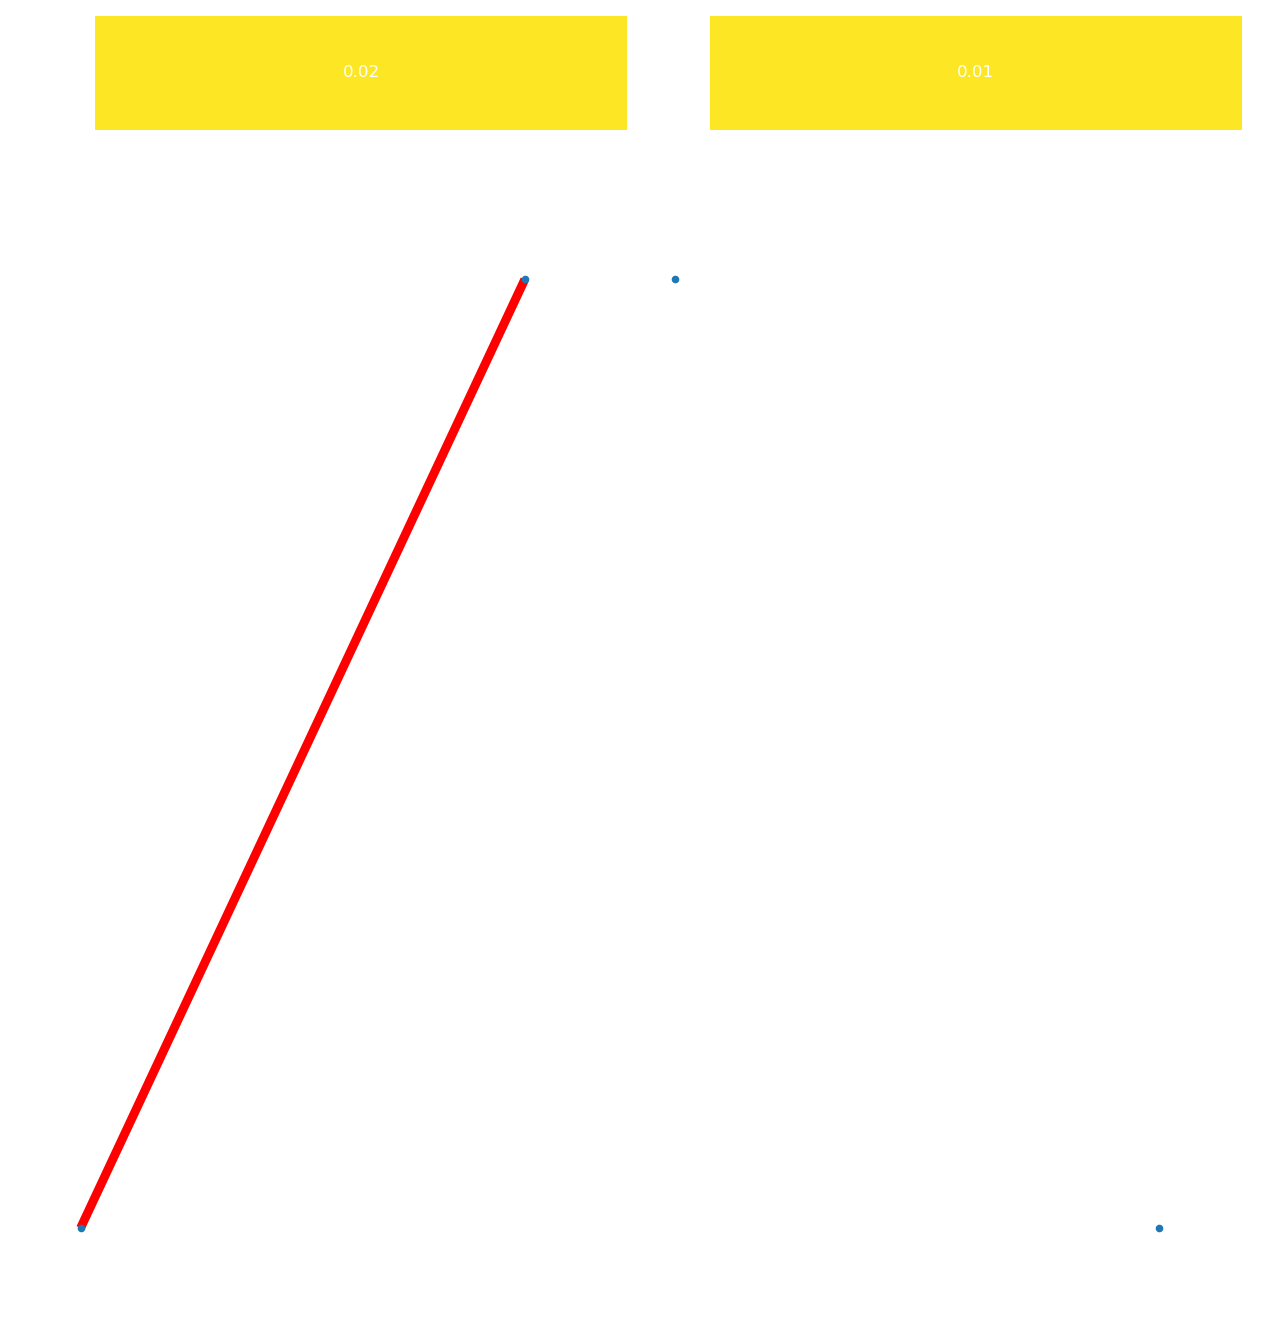

In [6]:
from util.plotting  import *

display_dict_and_graph(save_path=f'output/figure/ogbg_ppa', W=W[:k**2], regression_coeff=beta.T, fig_size=[10,10], plot_graph_only=True)